## Coding Exercise Kmeans

### 1. K-Means clustering with real data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')           # Turn off the warnings. 
%matplotlib inline

#### 1.1. Load the 'Iris' dataset from Seaborn:
from this list : https://github.com/mwaskom/seaborn-data

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df.drop(columns=['species'])                        # Only X variables.
Y = df['species']                                       # Only Y variable.
header_X = X.columns                                    # Store the column names of X.
type(header_X)

pandas.core.indexes.base.Index

In [4]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

#### 1.2. Apply k-means:

In [6]:
kmeans = KMeans(n_clusters=3, random_state=123)         # kmeans object for 3 clusters. radom_state=123 means deterministic initialization.
kmeans.fit(X)                                           # Unsupervised learning => Only X.
res = pd.Series(kmeans.labels_)                         # Cluster labeling result as Series.
print(np.shape(res))
print(np.shape(kmeans.cluster_centers_))

(150,)
(3, 4)


In [7]:
kmeans?

Type:        KMeans
String form: KMeans(n_clusters=3, random_state=123)
File:        ~/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence. The algorithm
    implemented is "greedy k-means++". It differs from the vanilla k-means++
    by making several trials at each sampling step and choosing the best centroid
    among them.

    'random': choose `n_clusters` observations (rows) at random from da

In [8]:
n0 = (res==0)
print(n0.sum())
n1 = (res==1)
print(n1.sum())
n2 = (res==2)
print(n2.sum())

38
50
62


In [19]:
# Frequency table of the observations labeled as '0'.
# This cluster has the majority 'virginica'.
case0 = Y[n0]
print(case0.value_counts())

species
virginica     36
versicolor     2
Name: count, dtype: int64


In [20]:
# Frequency table of the observations labeled as '1'.
# This cluster corresponds entirely to 'setosa'.
case1 = Y[n1]
print(case1.value_counts())

species
setosa    50
Name: count, dtype: int64


In [21]:
# Frequency table of the observations labeled as '2'.
# This cluster has the majority 'versicolor'.
case2 = Y[n2]
print(case2.value_counts())

species
versicolor    48
virginica     14
Name: count, dtype: int64


In [22]:
# A list that contains the learned labels.
learnedLabels = ['Virginica','Setosa','Versicolor']  

In [23]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [24]:
# Print out the cluster centers (centroids).
np.round(pd.DataFrame(kmeans.cluster_centers_,columns=header_X,index=['Cluster 0','Cluster 1','Cluster 2']),2)

,sepal_length,sepal_width,petal_length,petal_width
Cluster 0,6.85,3.07,5.74,2.07
Cluster 1,5.01,3.43,1.46,0.25
Cluster 2,5.90,2.75,4.39,1.43


#### 1.3. Visualize:

In [27]:
case0

52     versicolor
77     versicolor
100     virginica
102     virginica
103     virginica
104     virginica
105     virginica
107     virginica
108     virginica
109     virginica
110     virginica
111     virginica
112     virginica
115     virginica
116     virginica
117     virginica
118     virginica
120     virginica
122     virginica
124     virginica
125     virginica
128     virginica
129     virginica
130     virginica
131     virginica
132     virginica
134     virginica
135     virginica
136     virginica
137     virginica
139     virginica
140     virginica
141     virginica
143     virginica
144     virginica
145     virginica
147     virginica
148     virginica
Name: species, dtype: object

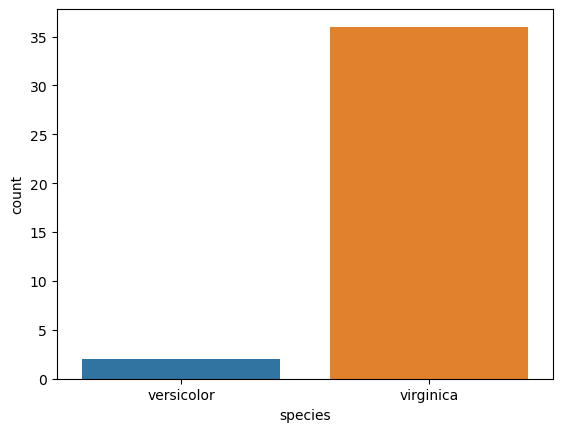

In [28]:
# Visualize the labeling content of the cluster 0. 
sns.countplot(x=case0)#.set_title('Cluster 0')
plt.show()

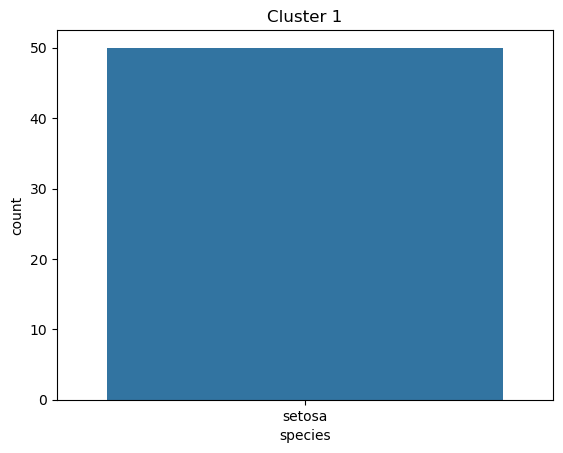

In [29]:
# Visualize the labeling content of the cluster 1. 
sns.countplot(x=case1).set_title('Cluster 1')
plt.show()

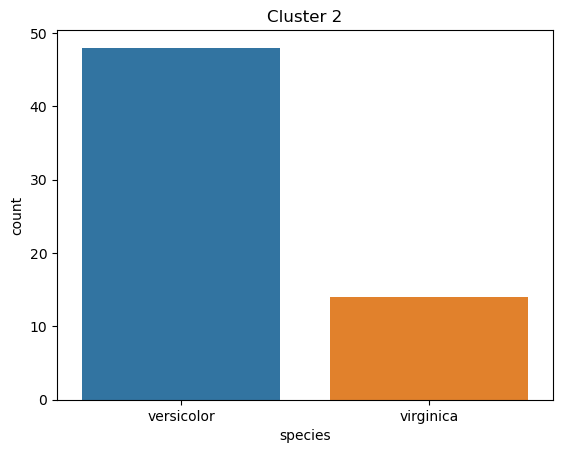

In [30]:
# Visualize the labeling content of the cluster 2. 
sns.countplot(x=case2).set_title('Cluster 2')
plt.show()

#### 1.4. Prediction based on what we have learned:

In [31]:
# For a given observation of X, predict the species from what we have learned. 
# Case #1.
X_test = {'sepal_length': [7.0] ,'sepal_width': [3.0] , 'petal_length': [5.0]  ,'petal_width': [1.5] }   # Only X is given.
X_test = pd.DataFrame(X_test)
print(kmeans.predict(X_test))
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

[0]
Predicted cluster 0 with the most probable label 'Virginica'


In [32]:
# Case #2.
X_test = {'sepal_length': [4.5] ,'sepal_width': [3.0] , 'petal_length': [1.0]  ,'petal_width': [1.0] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 1 with the most probable label 'Setosa'


In [33]:
# Case #3.
X_test = {'sepal_length': [6.0] ,'sepal_width': [3.0] , 'petal_length': [4.0]  ,'petal_width': [1.0] }   # Only X is given.
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

Predicted cluster 2 with the most probable label 'Versicolor'
